In [18]:
%matplotlib inline

from IPython.display import HTML,Image,SVG,YouTubeVideo


# Linear filtering

In the previous chapter, the processed value of a pixel was only a function of its orignal value. Here the processed value will also take into account the surrounding pixels as well. We speak about pixel *neighborhood. *

## Neighborhood
Pixel neighborhood is defined by a binary structuring element $B$ having an origin.

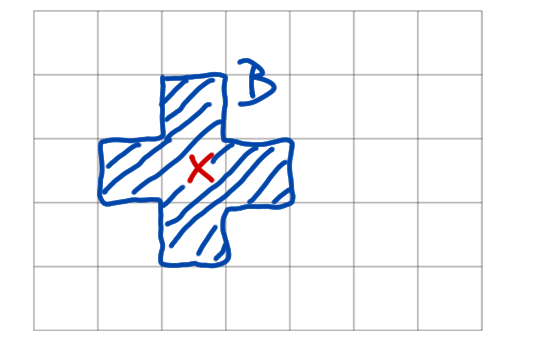

In [19]:
Image('../data/b.png')

For a specific pixel (the gray one below), the neighborhood defined by $B$ ...

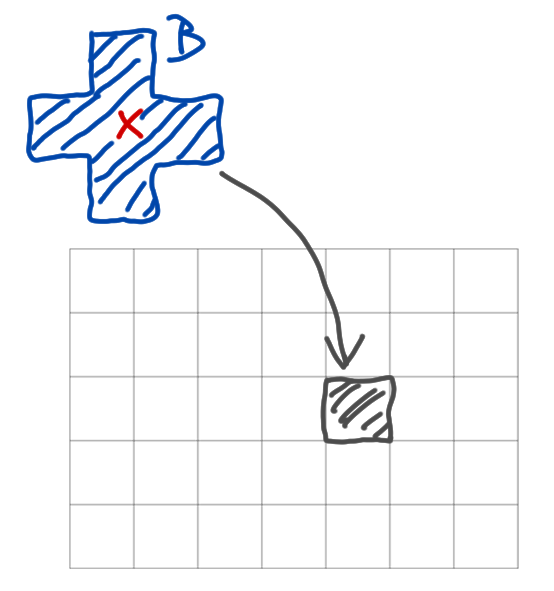

In [20]:
Image('../data/b1.png')

is the ensemble of pixels belonging to $B$ when its origin is moved on the pixel of interest.

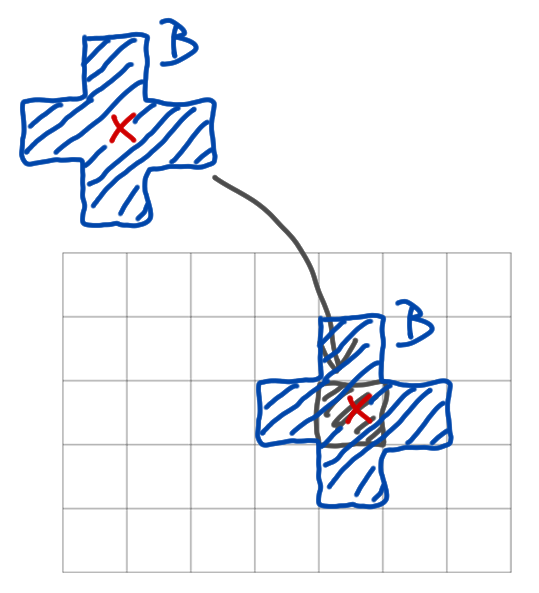

In [21]:
Image('../data/b2.png')

Structuring elements can have any size and shape. Often the size of the structuring element will directly impact the process and also the processing time. 

The previous element is known as the 4-neighbors.

Common structuring element are:

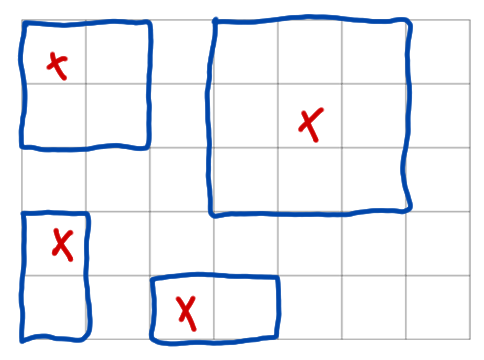

In [22]:
Image('../data/b3.png')

the upper right is known as the 8-neighbors, we understand why...

One also use bigger element, such as disk with a bigger radious such as:

In [23]:
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera
plt.style.use('ggplot')



Question:
* what appens close to the borders ?

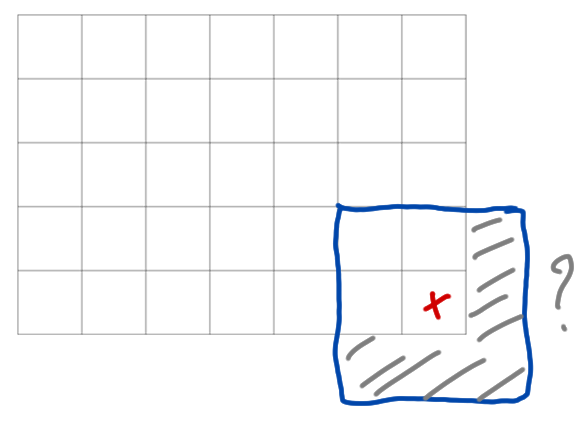

In [24]:
Image('../data/b5.png')

Because the neighboorhood is not defined when one pixel of $B$ is outside the image, only the innerpart of the image can by processed by a structuring element.

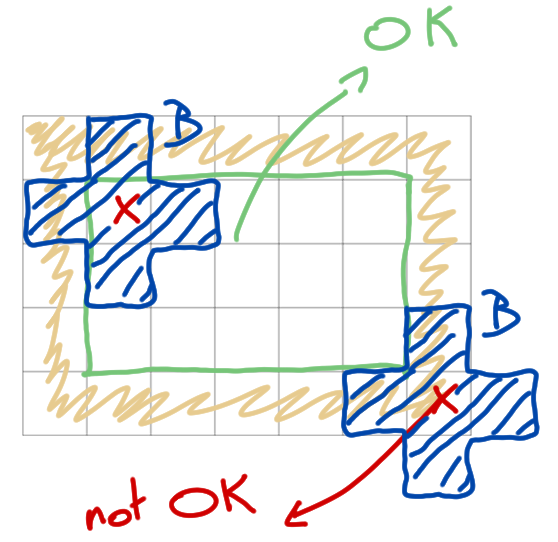

In [25]:
Image('../data/b6.png')

## Local processing
A first local process we can do using a structring element is a weighted sum of the pixels value inside the neighborhood.

We associate, with each element of the structuring element, a weight.

This is also known as the convolution of the image with the structuring element.

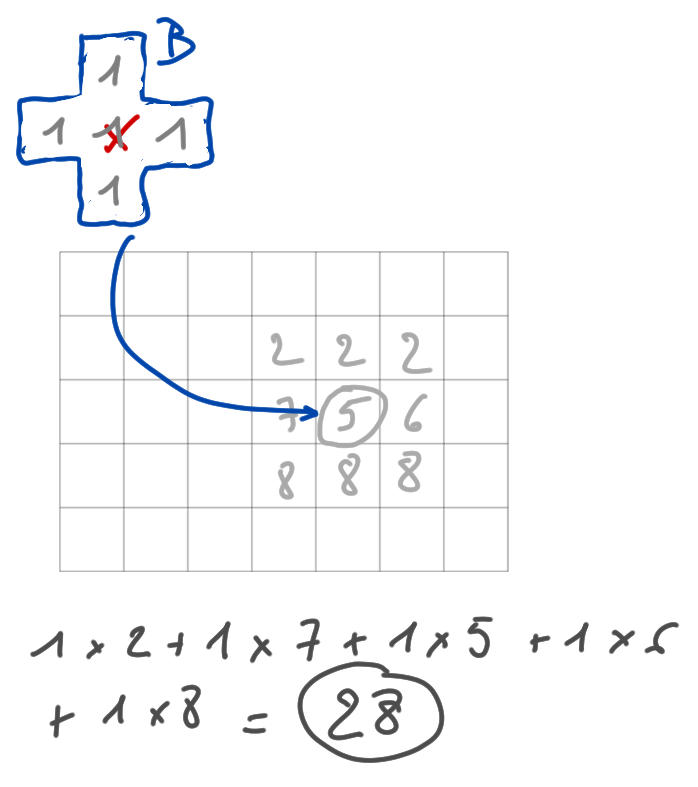

In [26]:
Image('../data/conv1.png')

Let's have a look on a real example ... the cameraman, we apply the mean filter which is basically the sum of the pixels inside the structuring element, divided by the number of pixels of the structuring element.

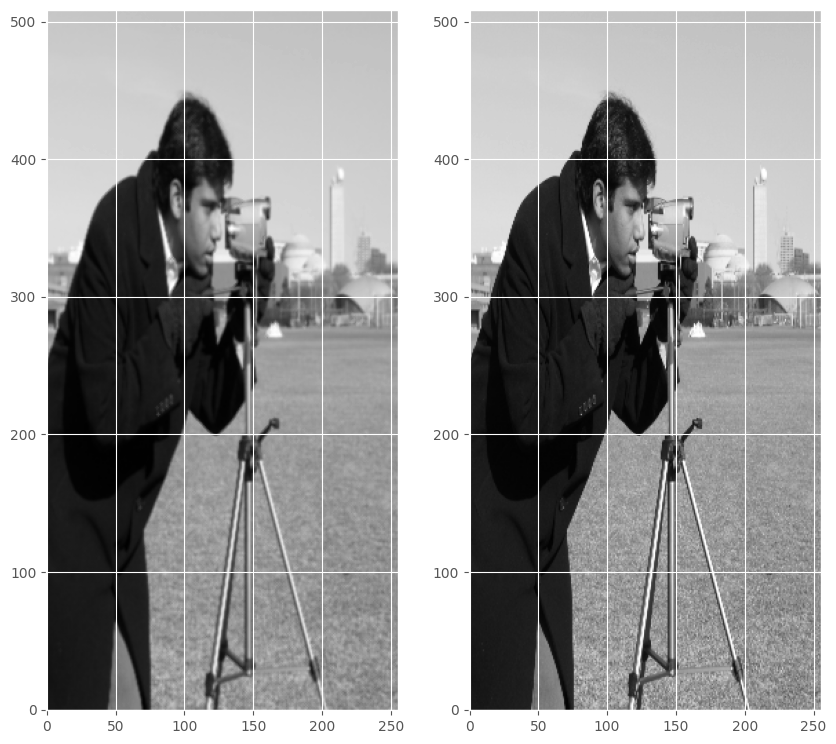

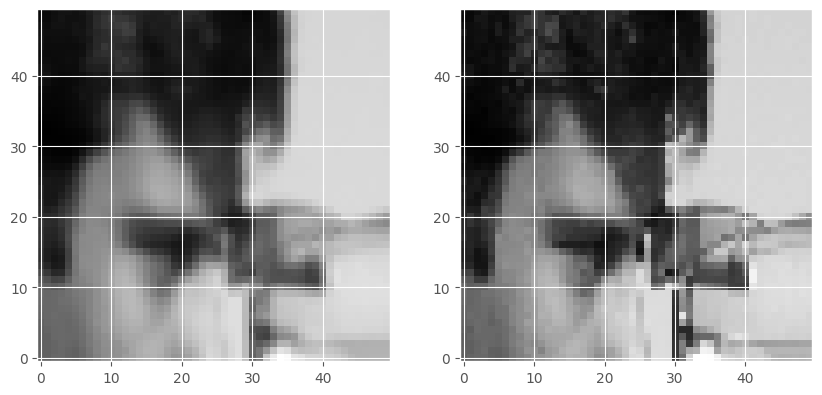

In [27]:
from skimage.morphology import disk
from skimage.data import camera
from skimage.filters.rank import mean
def compare(f,g,roi=None):
    plt.figure(figsize=[10,10])
    plt.subplot(1,2,1)
    plt.imshow(f,cmap=plt.cm.gray)
    plt.gca().invert_yaxis()
    plt.subplot(1,2,2)
    plt.imshow(g,cmap=plt.cm.gray)
    plt.gca().invert_yaxis()
    if roi is not None:
        f = f[roi[0]:roi[1],roi[2]:roi[3]]
        g = g[roi[0]:roi[1],roi[2]:roi[3]]
        plt.figure(figsize=[10,10])
        plt.subplot(1,2,1)
        plt.imshow(f,cmap=plt.cm.gray)
        plt.gca().invert_yaxis()
        plt.subplot(1,2,2)
        plt.imshow(g,cmap=plt.cm.gray)
        plt.gca().invert_yaxis()
g = camera()[-1:2:-1,::2]
f = mean(g,disk(1))
   
compare(f,g,roi=[350,400,100,150])


We observe that noise is smoothed and that small details can disappear. If we increase the radius of the structuring element we see how bigger borders are blurred.

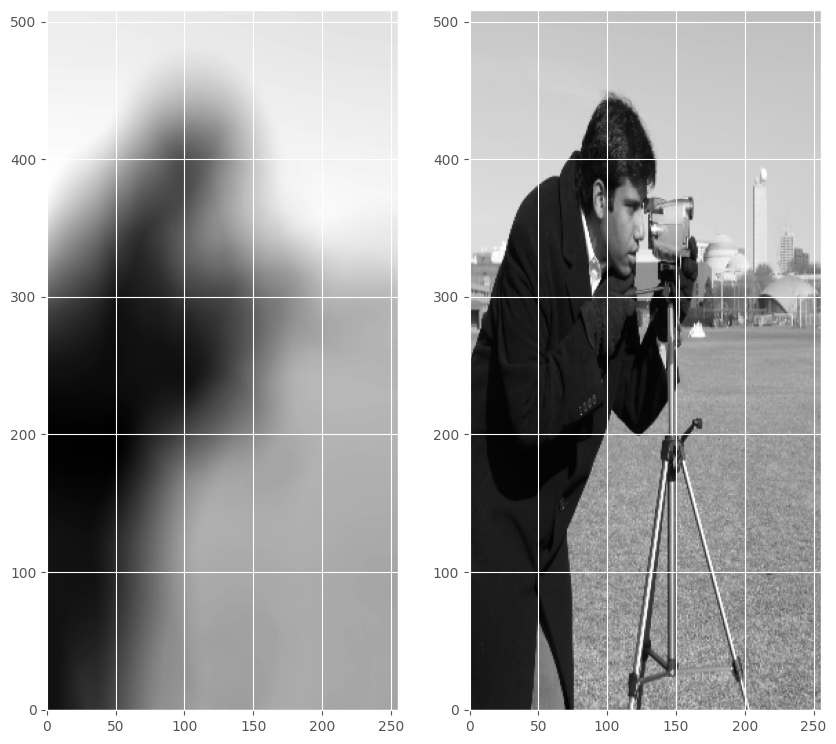

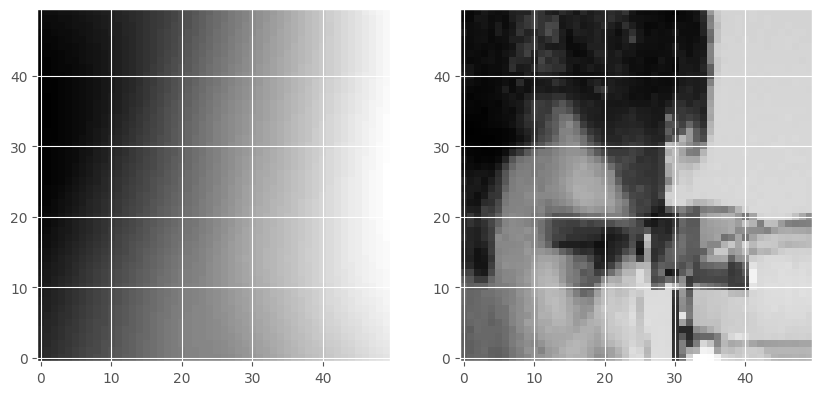

In [28]:
f = mean(g,disk(40))
#plt.imshow(disk(4))
compare(f,g,roi=[350,400,100,150])

On can implement the convolution algorithm using embedded loops for a structuring element 3x3:


    I = [source image]
    F = [destination image]
    n  = 9
    for x in 1:sizex-1:
        for y in 1:sizey-1:
            sum = 0
            for i in -1:+1:
                for j in -1:+1:
                    sum += I[n+i,m+j]
            F[n,m] = sum/n


as the structuring element increases in size, the number of loops is increasing fast...

Questions:

* How the previous example returns a value for pixels close to the border ?
* what should be the destination image type ?

## Fourier transform
### recall
Fourier analysis allows to play with a signal in the frequency domain. 

In 1D signal, the continuous Fourier transform of a function $f(x)$ is given by:

$$F(u)= \mathcal{F(f(x))} = \int_{-\infty}^\infty f(x)\ e^{- i \, 2\pi \, ux}\,dx,$$

$$ e^{- i \, 2\pi \, ux} = \cos(2\pi\, ux) - i\,\sin(2\pi\, ux)$$ 

the $u$ variable is in the frequency domain,

in general, the Fourier transform of a real signal is complex, 

$$ F(u) = |F(u)|\, e^{\,i \, \phi(u)}$$

with an amplitude:

$$ |F(u)| = \big[R²(u) + I²(u)\big]^{1/2} $$

and a phase:

$$ \phi(u) = \tan^{-1} \big(\frac{I(u)}{R(u)}\big)$$

the inverse Fourier transform is given by:

$$f(x) = \mathcal{F}^{-1}(F(u)) =  \int_{-\infty}^\infty F(u)\ e^{ i \, 2\pi \, ux}\,du,$$

the magnitude function $|F(u)|^2$ is called the Fourier spectrum  or power spectrum of $f(x)$.


Power spectrum for several 1D step.

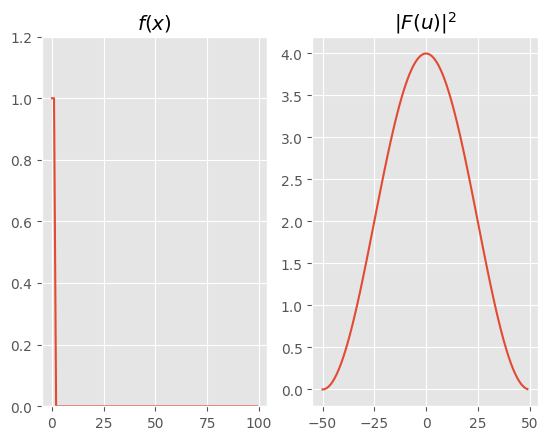

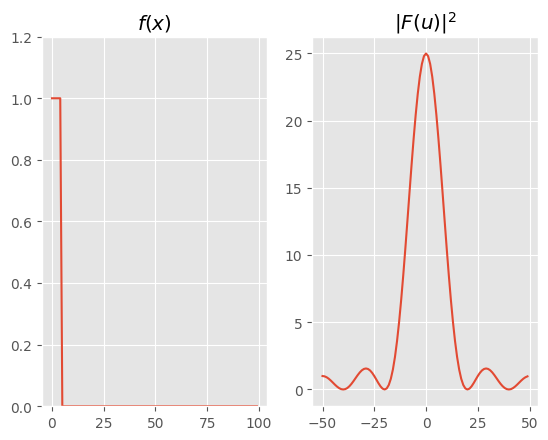

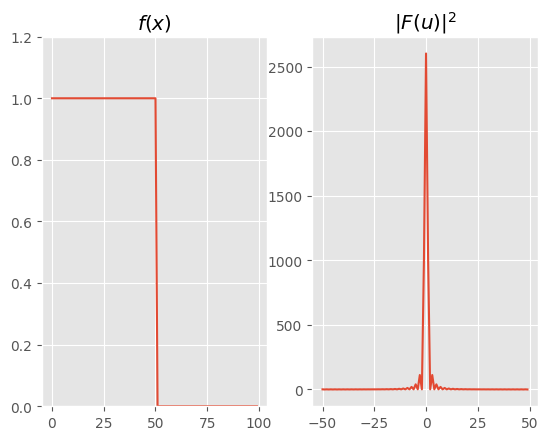

In [29]:
import numpy as np
from numpy.fft import fft,fftshift,ifftshift
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def step_power(length):
    nsample = 100
    t = np.arange(nsample)
    x = t<=length
    fx = fftshift(fft(x))
    power = np.abs(fx)**2 
    angle = np.angle(fx)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.gca().set_ylim([0,1.2])
    plt.title('$f(x)$')
    plt.plot(x)
    plt.subplot(1,2,2)
    plt.plot(np.arange(-nsample/2,nsample/2),power);
    plt.title('$|F(u)|^2$')
    
step_power(1)
step_power(4)
step_power(50)

Power spectrum of a sine waves for various wave length, the peak position in the Fourier power spectrum corresponds to the sine frequency.

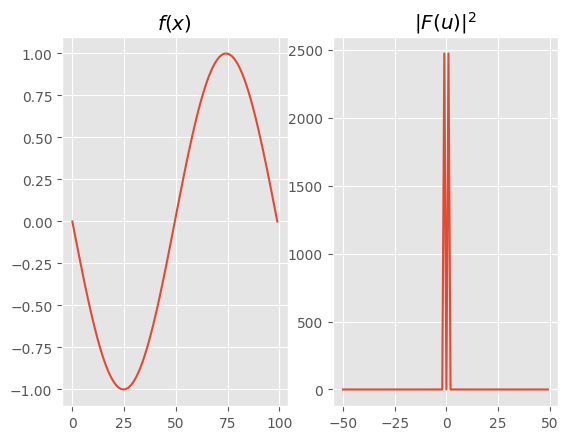

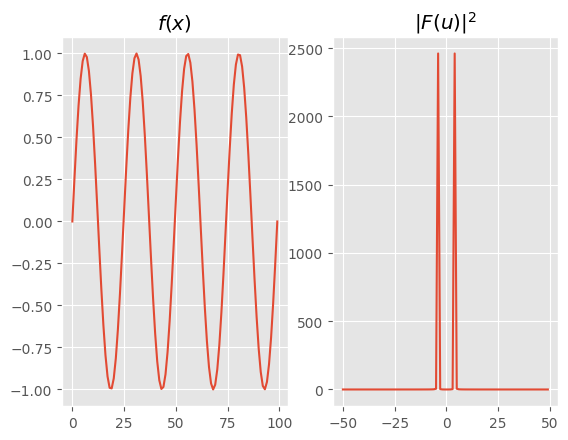

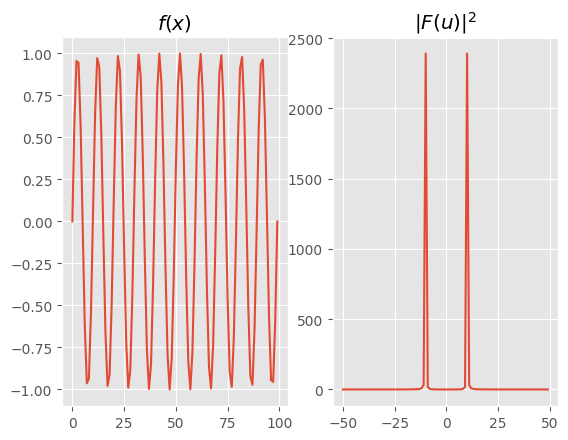

In [30]:
def sine_power(freq):
    nsample = 100
    t = np.linspace(-np.pi,np.pi,nsample)
    x = np.sin(t*freq)
    fx = fftshift(fft(x))
    power = np.abs(fx)**2 
    angle = np.angle(fx)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.gca().set_ylim([-1.1,1.1])
    plt.title('$f(x)$')
    plt.plot(x)
    plt.subplot(1,2,2)
    plt.plot(np.arange(-nsample/2,nsample/2),power);
    plt.title('$|F(u)|^2$')
    
sine_power(1)
sine_power(4)
sine_power(10)

Power spectrum of two differnt mixtures of three sine waves:

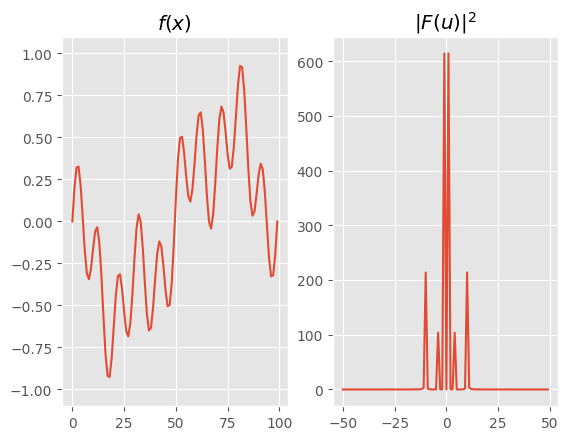

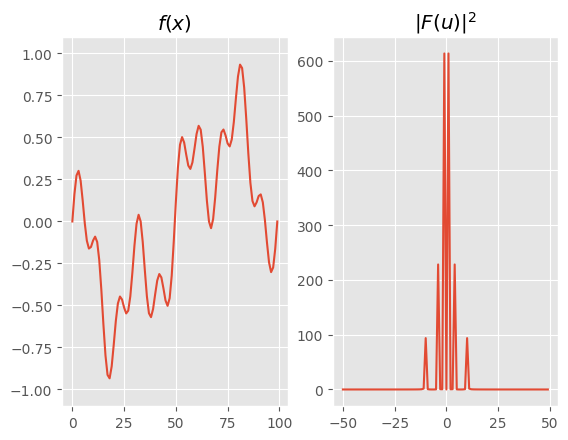

In [31]:
def mix_sine_power(freq):
    nsample = 100
    t = np.linspace(-np.pi,np.pi,nsample)
    x = np.zeros_like(t)
    for f,a in freq:
        x += np.sin(t*f)*a
    fx = fftshift(fft(x))
    power = np.abs(fx)**2 
    angle = np.angle(fx)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.gca().set_ylim([-1.1,1.1])
    plt.plot(x)
    plt.title('$f(x)$')
    plt.subplot(1,2,2)
    plt.plot(np.arange(-nsample/2,nsample/2),power);
    plt.title('$|F(u)|^2$')
    
mix_sine_power([(1,.5),(4,.2),(10,.3)])
mix_sine_power([(1,.5),(4,.3),(10,.2)])


### 2D Fourier transform

Similarily, 2D Fourier transform is defined as:

$$F(u,v) = \mathcal F(f(x,y)) =  \int_{-\infty}^\infty \int_{-\infty}^\infty f(x,y)\, e^{- i \, 2\pi \, (u x+v y)} dx \, dy $$

the equivallent step transform is given bellow:


C:\Users\thoma\AppData\Local\Temp\ipykernel_24076\412719814.py:12: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  r = np.zeros((n,n),dtype = np.complexfloating)


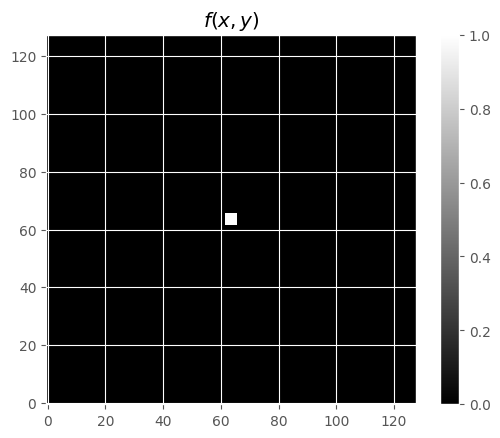

In [32]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import matplotlib.cm as cm
import scipy as scp
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
from scipy import ndimage
from mpl_toolkits.mplot3d import axes3d

w = 2
n = 128
r = np.zeros((n,n),dtype = np.complexfloating)
r[int(n/2)-w:int(n/2)+w,int(n/2)-w:int(n/2)+w] = 1.0 + 0.0j

F = fft2(r) #2D FFT of the image
rr = ifft2(F) #2D inverse FFT of F 

real_part = F.real
imag_part = F.imag

fig = plt.figure(1)
plt.imshow(r.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.colorbar()
plt.title('$f(x,y)$');

The original image consist of a 128x128 image containing zeros everywhere except in its center (a 2x2 square).

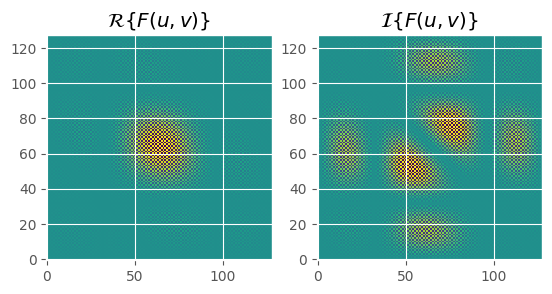

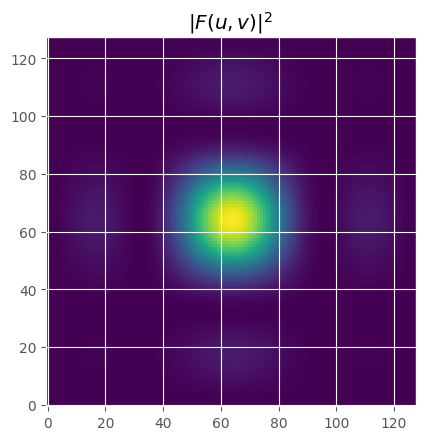

In [33]:
fig = plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(fftshift(real_part),interpolation='nearest',origin='lower')
plt.title('$\mathcal{R} \{ F(u,v)\}$')

plt.subplot(1,2,2)
plt.imshow(fftshift(imag_part),interpolation='nearest',origin='lower')

plt.title('$\mathcal{I} \{ F(u,v)\}$')

fig = plt.figure(3)
plt.imshow(np.abs(fftshift(F))**2,interpolation='nearest',origin='lower')

plt.title('$|F(u,v)|^2$');

In the Fourier spectrum, the zero spatial frequency is in the center. We see that most of the energy is in the central part of th the spectrum (a great part of the image has no transition), however, because of the sharp border of the pixel we have also higher frequencies available, the figure below illustrates the $\sin(x)/x$ aspect of the power spectrum of the 2D step function.

In [34]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(range(n),range(n))
Z = np.abs(fftshift(F))**2
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-10, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=140, cmap=cm.coolwarm)

plt.xlabel('$u$')
plt.ylabel('$v$')
plt.title('$|F(u,v)|^2$');


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1000x1000 with 0 Axes>

The inverse transform is illustrate below, this is the result of the FFT inverse transform of the previous transformed image. We get the original image back.

In [ ]:
fig = plt.figure()
plt.imshow(rr.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.colorbar()
plt.title('$\mathcal{F}^{-1}(F(u,v))$');


### Phase and amplitude

What appends if we add noise to amplitude or to phase ?

In [ ]:
ima = camera()[-1::-1,:]
F = fft2(ima)
amplitude = np.abs(F)
angle = np.angle(F)

noise = np.random.random(ima.shape)
n_amplitude = amplitude * (1+10*noise)

real = n_amplitude * np.cos(angle)
imag = n_amplitude * np.sin(angle)

n_F = real + 1j *imag

n_ima = np.real(ifft2(n_F))

fig = plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(ima,interpolation='nearest',origin='lower')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(n_ima,interpolation='nearest',origin='lower')
plt.colorbar();
plt.title('amplitude * (1+10*noise)');


In [ ]:
ima = camera()[-1::-1,:]
F = fft2(ima)
amplitude = np.abs(F)
angle = np.angle(F)

noise = np.random.random(ima.shape)
n_angle = angle * (1+.5*noise)


real = amplitude * np.cos(n_angle)
imag = amplitude * np.sin(n_angle)

n_F = real + 1j *imag

n_ima = np.real(ifft2(n_F))

fig = plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(ima,interpolation='nearest',origin='lower')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(n_ima,interpolation='nearest',origin='lower')
plt.colorbar();
plt.title('angle * (1+.5*noise)');


### Discrete Fourier transform

This is the Fourier transform for discrete signals, if $f(x)$ is a discrete function with $N$ samples $x = 0,\dots,N-1$.

The discrete Fourier transform is given by:

$$ F(u) = \frac{1}{N} \sum_{x=0}^{N-1}f(x) \, e^{- i \, 2\pi \, ux/N}$$

and the corresponding inverse transform is:

$$ f(x) = \sum_{u=0}^{N-1}F(u) \, e^{i \, 2\pi \, ux/N}$$

the 2D extension is :

$$ F(u,v) = \frac{1}{MN} \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y) \, e^{- i \, 2\pi \, (ux/M + vy/N)}$$

$$ f(x,y) = \sum_{u=0}^{M-1}\sum_{v=0}^{N-1}F(u,v) \, e^{i \, 2\pi \, (ux/M + vy/N)}$$

### The Fast Fourier Transform algorithm

The FFT algorithm enable to drastically diminish the number of operation for the discrete Fourier transform of a function. Without going into details (see [DIP] p 120), the complexity of the original direct Fourier transform algorithm goes from $N^2$ to $N \log_2 N$ for FFT method, which is a major improvement especially when image size $N$ is big.

Because image are discrete functions, and because we are interested in doing convolution with them, if the size of the structuring element is big, one may use the FFT in place of naïve convolution techniques as described above. 

> The FFT algorithm changes the order of the coefficients, in order to have the 0 frequency back in the center of the image we use the `fftshift()` function.

## Convolution

Local processing as described before is in fact a convolution, thanks to the nice properties of the Fourier domain, convolution can be computed in an other way.

Convolution of two function is defined as:

$$f(x)*g(x) = \int _{-\infty} ^{\infty} f(u) g(x-u) du $$

the corresponding operation in the frequency domain is:

$$f(x)*g(x) \Leftrightarrow F(u)G(u)$$

in other word, the convolution in the signal space is equivallent to a term by term product in the frequency domain.

Similarily for 2D images we have:

$$f(x,y)*g(x,y) \Leftrightarrow F(u,v)G(u,v)$$

so the convolution of an image $f$ by a structuring element $g$ consist of two discrete Fourier transform, a simple term-by-term matrix product and an inverse discrete Fourier transform.

The following example illustrate a low pass filter (only frequencies near the center of the image are kept).

C:\Users\thoma\AppData\Local\Temp\ipykernel_24076\2686724456.py:12: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  s = np.zeros(im.shape,dtype = np.complexfloating)
C:\Users\thoma\AppData\Local\Temp\ipykernel_24076\2686724456.py:16: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  c = np.zeros(im.shape,dtype = np.complexfloating)
C:\Users\thoma\AppData\Local\Temp\ipykernel_24076\2686724456.py:24: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  c = c.astype(np.complexfloating)/(255.0+0j)
C:\Users\thoma\AppData\Local\Temp\ipykernel_24076\2686724456.py:26: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  F1 = fft2(im.astype(np.complexfl

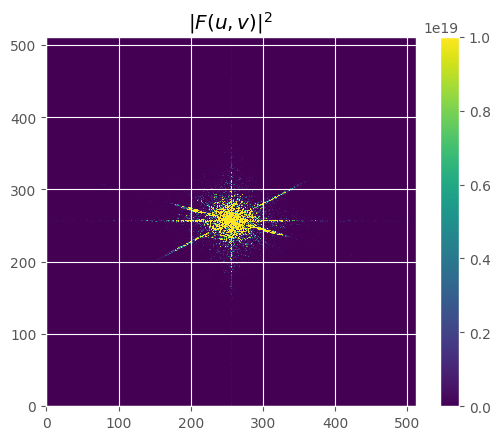

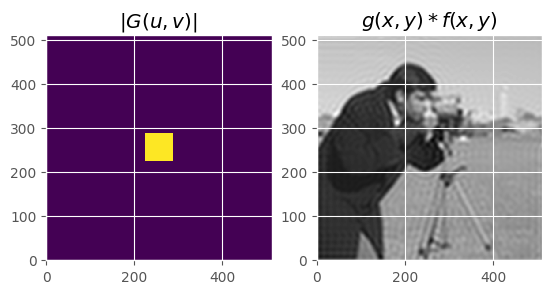

In [35]:
from skimage.data import camera
from skimage.filters import rank as skr
from skimage.morphology import disk

im = camera()[-1::-1,::]

w,h = im.shape

n = 32

#square filter
s = np.zeros(im.shape,dtype = np.complexfloating)
s[int(w/2)-n:int(w/2)+n,int(h/2)-n:int(h/2)+n] = 1.0 + 0.0j

#circular filter 
c = np.zeros(im.shape,dtype = np.complexfloating)
for i in range(w):
    for j in range(h):
        if ((i-w/2)**2 + (j-h/2)**2)<(n*n):
            c[i,j] = 1.0 + 0.0j
            
#smooth filter borders
c = skr.mean(np.real(c*255).astype('uint8'),disk(10))
c = c.astype(np.complexfloating)/(255.0+0j)

F1 = fft2(im.astype(np.complexfloating))
F3 = F1*ifftshift(s)
F4 = F1*ifftshift(c)

#high pass using the complement of c
F5 = F1*ifftshift((1.0 + 0j)-c)

psF1 = (F1**2).real

low_pass_rec = ifft2(F3) 
low_pass_circ = ifft2(F4)
high_pass_circ = ifft2(F5) 

fig = plt.figure(1)
plt.imshow(np.abs(fftshift(psF1))**2,interpolation='nearest',origin='lower',vmax = 10e18)
plt.title('$|F(u,v)|^2$')
plt.colorbar()

fig = plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(s.real,interpolation='nearest',origin='lower')
plt.title('$|G(u,v)|$')
plt.subplot(1,2,2)
plt.imshow(low_pass_rec.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.title('$g(x,y)*f(x,y)$');

One remark the presence of oscillation in tje filtered image, this is due to the sharpness of the filter used, bellow the same low-pass filter but with smoother border.

In [ ]:
fig = plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(c.real,interpolation='nearest',origin='lower')
plt.title('$g(x,y)$')
plt.subplot(1,2,2)
plt.imshow(low_pass_circ.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.title('$g(x,y)*f(x,y)$');

If we suppress the central part of the spectrum we obtain a high pass filter, i.e. only border are kept.

In [ ]:
fig = plt.figure(4)
plt.subplot(1,2,1)
plt.imshow(1.0-c.real,interpolation='nearest',origin='lower')
plt.title('$g(x,y)')
plt.subplot(1,2,2)
plt.imshow(high_pass_circ.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.title('$g(x,y)*f(x,y)$');

## Correlation

Similarily, correlation can benefit from the Fourier domain properties.

Correlation is defined as:

$$ f(x)\circ g(x) = \int _{-\infty} ^{\infty} f^*(u) g(x+u) du$$

where $f^*$ is the complex conjugate of $f$ (i.e. $f$ for real image).

the corresponding operation in the frequency domain is:

$$f(x)\circ g(x) \Leftrightarrow F^*(u)G(u)$$

C:\Users\thoma\AppData\Local\Temp\ipykernel_24076\284496471.py:4: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  im = camera().astype(np.complexfloating)
C:\Users\thoma\AppData\Local\Temp\ipykernel_24076\284496471.py:10: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  g = np.zeros((m,n),dtype = np.complexfloating)


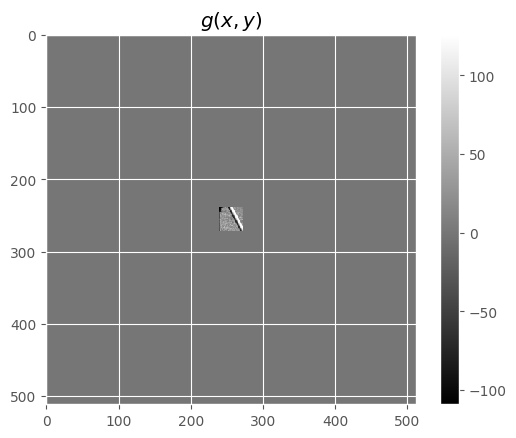

In [36]:
from skimage.data import camera


im = camera().astype(np.complexfloating)
target_center = (314,355)
w = 16
crop = im[target_center[1]-w:target_center[1]+w,target_center[0]-w:target_center[0]+w]
m,n = im.shape

g = np.zeros((m,n),dtype = np.complexfloating)
g[int(n/2)-w:int(n/2)+w,int(m/2)-w:int(m/2)+w] = crop - np.mean(im) + .0j

#normalize
f = im-np.mean(im)


plt.figure(2)
plt.imshow(g.real,interpolation='nearest',cmap=cm.gray)
plt.colorbar()
plt.title('$g(x,y)$');

F = fft2(f)
G = fft2(np.conjugate(g))

R = F*G
r = fftshift(np.real(ifft2(R)))

corr = 255*((r-np.min(r))/(np.max(r)-np.min(r)))
#corr = 255*(255*((r-np.min(r))/(np.max(r)-np.min(r)))>250)


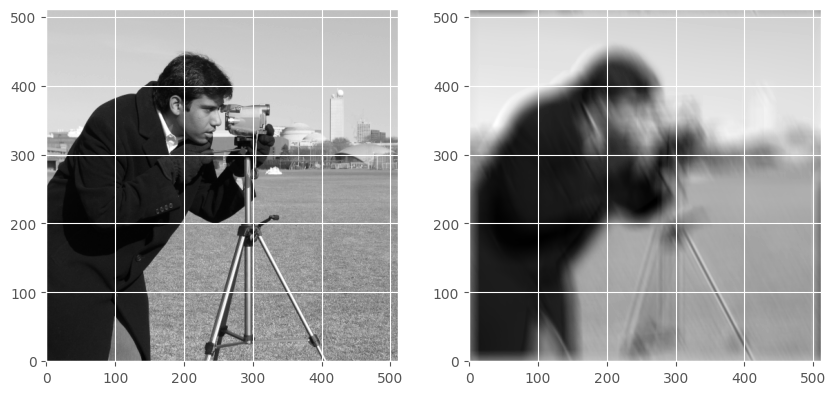

In [37]:
compare(np.real(im[-1::-1,:]),np.real(corr[-1::-1,:]))

## Adapted filter



C:\Users\thoma\AppData\Local\Temp\ipykernel_24076\1441654596.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = imread('../data/moire1.png').astype(np.float)


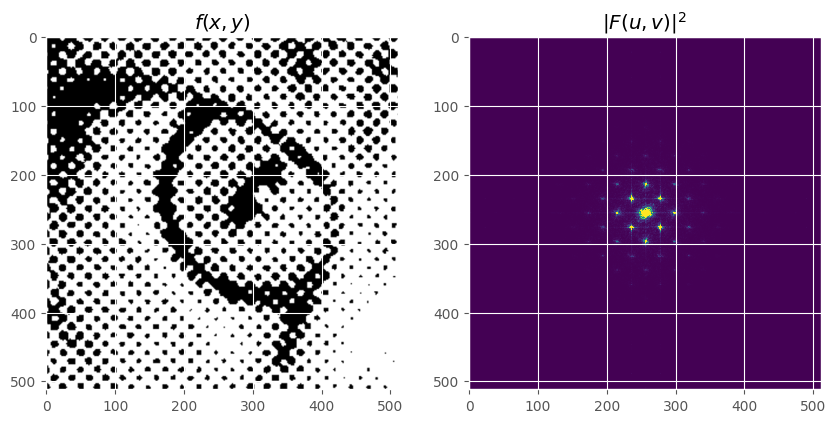

In [38]:
from skimage.io import imread
im = imread('../data/moire1.png').astype(np.float)
f = fft2(im)

power = fftshift(np.abs(f)**2)
pmax = np.max(power)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = cm.gray)
plt.title('$f(x,y)$');
plt.subplot(1,2,2)
plt.imshow(power,vmin=0,vmax=pmax/5000.);
plt.title('$|F(u,v)|^2$');

Question:
* How to eliminate the repetitive raster pattern ?